# LDA Topic Modeling

This notebook implements topic modeling using gensim LDA

## Imports

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
import pickle
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize
pd.set_option('display.width',-1)

In [2]:
# run some files containing custom functions
%run -i '../scripts/helper_functions.py'

## Load Data

In [3]:
df = pd.read_csv('../data/all_data.csv')
df.head()

,reviews,rating,company
0,Great card! We get cash back for our grocery a...,4.0,American Express Blue Cash Preferred
1,While traveling we had to keep calling the Cre...,1.0,Credit One Bank
2,Great card to have! Love all the additional cr...,5.0,Capital One Quicksilver Rewards
3,no tengo tanta experiencia asi que no puedo da...,2.0,Citi Double Cash Card
4,This is a basic credit card. The cash back dea...,4.0,Bank of America Cash Rewards Credit Card


In [3]:
df.shape

(25708, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25708 entries, 0 to 25707
Data columns (total 3 columns):
reviews    25708 non-null object
rating     25708 non-null float64
company    25708 non-null object
dtypes: float64(1), object(2)
memory usage: 602.7+ KB


In [5]:
# Drop rows with missing value if any
df = df.dropna().reset_index(drop = True)

In [31]:
# Remove wide space in review texts
df['reviews']  = df['reviews'].apply(detokenizer)
df.to_csv('../data/all_data.csv', index = False) # save as csv file

In [32]:
#Display the index row
print_review(df, index =8489)

Review: i signed up for my card to have an emergency fund source for big dollar purchases that seem to always happen just before the next paycheck  it has been excellent so far  i've enjoyed having it, the interest rate is fantastic, and the payment terms have been more than fair  i love the rotating categories as well  so far they've been a lot of places that i shop, so i've gotten to get reward points for a lot of my purchases  this is definitely a card i'd recommend
Rating: 5.0
Credit card: Discover it Cash Back


In [3]:
# reload the data
df =pd.read_csv('../data/all_data.csv') 

In [4]:
review_count = df.groupby('company')['reviews'].count().sort_values(ascending = False)
review_count.head()

company
Bank of America Cash Rewards Credit Card    2476
Capital One Quicksilver Rewards             2292
Capital One Venture Rewards                 2204
Capital One Platinum                        2103
Credit One Bank                             2016
Name: reviews, dtype: int64

In [5]:
len(review_count)

40

Text(0, 0.5, 'number of reviews')

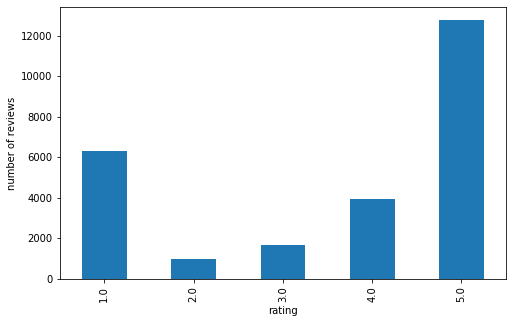

In [6]:
df.groupby('rating')['reviews'].count().plot(kind = 'bar', figsize = (8,5))
plt.ylabel('number of reviews')
#plt.savefig('../figures/fig1.pdf')

# Data Pre-processing
- Document cleaning
- Tokenization
- Lemmatization
- Stopwords removal
- Bag of words
- Topic modeling with LDA

In [4]:
from nltk.corpus import stopwords
import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel, LdaModel, LdaMulticore

In [5]:
# text preprocessing
df = pre_process_text(df, 'reviews') 

In [6]:
# Add additional stop words to the default nltk stopwords
my_stop_words = ['capital','america', 'redcard', 'target','amazon', 'card', 'citibank', 'credit','merrick', 'discover', 'citi',
                 'amex', 'express', 'go', 'paypal', 'chase', 'american', 'one', 'would', 'ask','asking','really', 
                 'get', 'know', 'express', 'ever','use','say', 'recently', 'also', 'always', 'call', 'give',  'tell', 
                 'take', 'never', 'costco', 'time', 'make', 'account', 'try','number', 'send', 'new', 'even',
                 'sony', 'us', 'husband', 'car', 'capitol', 'wife', 'book','could','okay', 'mastercard', 'want',
                 'honestly', 'eppicard', 'need', 'family', 'cap', 'another', 'line', 'com', 'fico', 'quicksilver',
                'link', 'sear', 'scotiabank', 'barclays', 'first']

stop_words = stopwords.words('english')
stop_words.extend(my_stop_words)

In [7]:
# tokenization
df['tokens'] =  df['reviews'].apply(my_tokenizer)

In [52]:
def word_count(text):
    """Plot the most frequency words in the corpus"""
    all_reviews = ' '.join(text) # join all reviews
    token_count = Counter(my_tokenizer(all_reviews)) # count each word
    common_words =  dict( token_count.most_common(n=25) ) # count most common 20 words
    freq_plot = pd.Series(common_words, index=None).plot(kind = 'bar', figsize=(10,5))
    plt.ylabel('count')
    #plt.savefig('../figures/fig2.pdf')

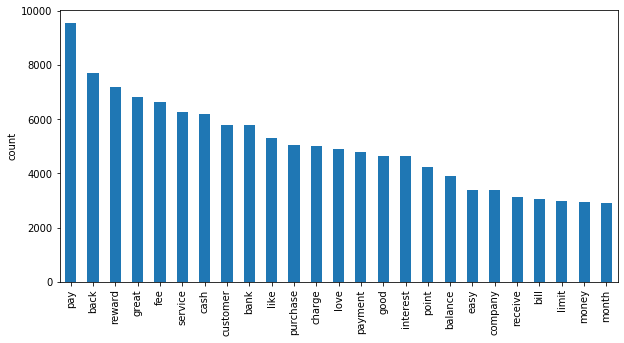

In [18]:
word_count(df.reviews)

## Bigrams and Trigrams

In [8]:
def add_bigram(token_list):
    """add bigrams in the data"""
    bigram = gensim.models.Phrases(token_list)
    bigram = [bigram[line] for line in token_list]
    return bigram

def add_trigram(token_list):
    """add trigrams in the data"""
    bigram = add_bigram(token_list)
    trigram = gensim.models.Phrases(bigram)
    trigram = [trigram[line] for line in bigram]
    return trigram

In [9]:
df['bigram_tokens'] = add_bigram(df.tokens)
df['trigram_tokens'] = add_trigram(df.tokens)
df.head()

,reviews,rating,company,tokens,bigram_tokens,trigram_tokens
0,great card! we get cash back for our grocery a...,4.0,American Express Blue Cash Preferred,"[great, cash, back, grocery, gas, purchase, fo...","[great, cash_back, grocery_gas, purchase, food...","[great, cash_back, grocery_gas, purchase, food..."
1,while traveling we had to keep calling the cre...,1.0,Credit One Bank,"[travel, keep, customer, service, lock, transa...","[travel, keep, customer_service, lock, transac...","[travel, keep, customer_service, lock, transac..."
2,great card to have! love all the additional cr...,5.0,Capital One Quicksilver Rewards,"[great, love, additional, rating, check, feature]","[great, love, additional, rating, check, feature]","[great, love, additional, rating, check, feature]"
3,no tengo tanta experiencia asi que no puedo da...,2.0,Citi Double Cash Card,"[tengo, tanta, experiencia, asi, que, puedo, d...","[tengo, tanta, experiencia, asi, que, puedo, d...","[tengo, tanta, experiencia, asi, que, puedo, d..."
4,this is a basic credit card the cash back dea...,4.0,Bank of America Cash Rewards Credit Card,"[basic, cash, back, deal, nice, cash, year, an...","[basic, cash_back, deal, nice, cash, year, ann...","[basic, cash_back, deal, nice, cash, year, ann..."


In [10]:
# Create a dictornary, i.e associate each unique token with unique integer ID
dictionary = corpora.Dictionary(df.trigram_tokens)
print(dictionary)

# Bag of words (document-term matrix)
corpus = [dictionary.doc2bow(text) for text in df.trigram_tokens]
print('Number of documents: %s'%len(corpus))

Dictionary(14540 unique tokens: ['apr_little_high', 'cash_back', 'food_gas', 'fully', 'great']...)
Number of documents: 25708


In [24]:
# Tfidf
# tfidf = models.TfidfModel(corpus)
# corpus_tfidf = tfidf[corpus]

In [25]:
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# Topic modeling with LDA

In [31]:
def compute_coherence_lda(corpus, dictionary, start=None, limit=None, step=None):
    """Compute c_v coherence for various number of topics """
    topic_coherence = []
    model_list = []
    tokens_list = df.trigram_tokens.values.tolist()
    texts = [[token for sub_token in tokens_list for token in sub_token]]
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus,id2word=dictionary, random_state=0,num_topics=num_topics,
                         alpha = 'auto', eta = 'auto')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        topic_coherence.append(coherencemodel.get_coherence())

    return model_list, topic_coherence

In [33]:
model_list, topic_coherence = compute_coherence_lda(corpus, dictionary, start=2, limit=40, step=3)

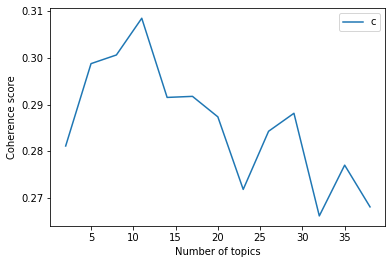

In [46]:
# Plot
num_topics = range(2, 40, 3)
plt.plot(num_topics, topic_coherence)
plt.xlabel("Number of topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.savefig('../figures/topic_coherence.png')

In [35]:
# Print the coherence scores
for top, cv in zip(num_topics, topic_coherence):
    print("{} topics  have coherence score of {}".format(top, round(cv, 4)))

2 topics  have coherence score of 0.2811
5 topics  have coherence score of 0.2988
8 topics  have coherence score of 0.3006
11 topics  have coherence score of 0.3085
14 topics  have coherence score of 0.2915
17 topics  have coherence score of 0.2918
20 topics  have coherence score of 0.2874
23 topics  have coherence score of 0.2718
26 topics  have coherence score of 0.2843
29 topics  have coherence score of 0.2881
32 topics  have coherence score of 0.2662
35 topics  have coherence score of 0.277
38 topics  have coherence score of 0.2681


In [36]:
optimal_lda = model_list[3]

In [ ]:
# lda model
# model = LdaModel(corpus=corpus,id2word=dictionary,
#                      random_state=0,num_topics=20,
#                      passes=20,iterations =1000,
#                      alpha = 'auto', eta = 'auto',
#                      update_every=1,chunksize=2000)

In [37]:
optimal_lda.show_topics(num_topics=11, num_words=10)

[(0,
  '0.062*"point" + 0.052*"great" + 0.038*"reward" + 0.034*"love" + 0.033*"travel" + 0.029*"easy" + 0.024*"customer_service" + 0.018*"like" + 0.014*"good" + 0.014*"purchase"'),
 (1,
  '0.053*"purchase" + 0.015*"item" + 0.015*"back" + 0.014*"store" + 0.014*"like" + 0.013*"gift" + 0.010*"reward" + 0.009*"prime" + 0.009*"buy" + 0.009*"point"'),
 (2,
  '0.065*"cash_back" + 0.051*"reward" + 0.047*"love" + 0.028*"great" + 0.026*"like" + 0.022*"purchase" + 0.014*"much" + 0.013*"back" + 0.012*"easy" + 0.012*"feature"'),
 (3,
  '0.021*"company" + 0.019*"phone" + 0.014*"issue" + 0.013*"charge" + 0.012*"online" + 0.012*"pay" + 0.011*"customer_service" + 0.010*"people" + 0.010*"problem" + 0.010*"website"'),
 (4,
  '0.027*"apply" + 0.023*"bank" + 0.020*"secure" + 0.020*"approve" + 0.018*"score" + 0.012*"deposit" + 0.010*"best" + 0.010*"application" + 0.010*"bad" + 0.009*"good"'),
 (5,
  '0.039*"pay" + 0.030*"month" + 0.029*"interest" + 0.020*"year" + 0.018*"balance" + 0.016*"charge" + 0.016*"fe

In [ ]:
# from wordcloud import WordCloud

In [ ]:
# fig, axes = plt.subplots(2,4, figsize=(15,10), sharex=True, sharey=True)
# for i, ax in enumerate(axes.flatten()):
#     fig.add_subplot(ax)
#     topics = optimal_lda.show_topics(num_topics=20, num_words=20, formatted=False)
#     plt.imshow(WordCloud().fit_words(dict(topics[i][1])))
#     plt.axis("off")
#     plt.title("Topic {}".format(i))
# plt.savefig('../figures/fig3.pdf')

In [38]:
import pyLDAvis.gensim

In [47]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(optimal_lda, corpus, dictionary,sort_topics=False)

/Users/sowerre/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x  \
topic             
0      0.204476   
1      0.084869   
2      0.198584   
3     -0.169034   
4     -0.031189   
5      0.022331   
6      0.140783   
7     -0.203070   
8     -0.167600   
9     -0.186009   
10     0.105858   

              y  \
topic             
0      0.009237   
1     -0.084240   
2     -0.093093   
3      0.033692   
4      0.003247   
5     -0.087762   
6      0.256436   
7      0.002779   
8      0.018885   
9     -0.018489   
10    -0.040694   

       topics  \
topic           
0           1   
1           2   
2           3   
3           4   
4           5   
5           6   
6           7   
7           8   
8           9   
9          10   
10         11   

       cluster  \
topic            
0            1   
1            1   
2            1   
3            1   
4            1   
5            1   
6            1   
7            1   
8            1   
9            1   
10           1   

            Freq  
topic             
0       7.943206  
1       5.813744  
2       8.810436  
3       8.385717  
4       4.864392  
5      12.841995  
6       2.597453  
7      18.961664  
8       6.559031  
9       8.063627  
10     15.158733  , topic_info=    Category  \
246  Default   
1    Default   
4    Default   
101  Default   
29   Default   
..       ...   
797  Topic11   
175  Topic11   
114  Topic11   
154  Topic11   
88   Topic11   

            Freq  \
246  6110.000000   
1    3867.000000   
4    6952.000000   
101  5957.000000   
29   4802.000000   
..           ...   
797   387.298248   
175   489.206696   
114   571.055664   
154   443.528839   
88    527.064392   

          Term  \
246    payment   
1    cash_back   
4        great   
101     reward   
29        love   
..         ...   
797        far   
175    problem   
114    company   
154      thing   
88         pay   

           Total  \
246  6110.000000   
1    3867.000000   
4    6952.000000   
101  5957.000000   
29   4802.000000   
..           ...   
797  1069.248291   
175  2137.348877   
114  3553.471191   
154  1938.954468   
88   5757.454590   

     loglift  \
246  30.0000   
1    29.0000   
4    28.0000   
101  27.0000   
29   26.0000   
..       ...   
797   0.8711   
175   0.4121   
114   0.0584   
154   0.4115   
88   -0.5043   

     logprob  
246  30.0000  
1    29.0000  
4    28.0000  
101  27.0000  
29   26.0000  
..       ...  
797  -5.3048  
175  -5.0712  
114  -4.9165  
154  -5.1692  
88   -4.9967  

[896 rows x 6 columns], token_table=      Topic  \
term          
110       1   
110       2   
110       3   
110       4   
110       5   
...     ...   
51       10   
51       11   
2053     11   
4502     11   
4260     11   

          Freq  \
term             
110   0.177324   
110   0.013299   
110   0.101961   
110   0.130460   
110   0.030398   
...        ...   
51    0.017440   
51    0.208453   
2053  0.978766   
4502  0.978566   
4260  0.958740   

                       Term  
term                         
110                    able  
110                    able  
110                    able  
110                    able  
110                    able  
...                     ...  
51                     year  
51                     year  
2053                   york  
4502          zero_interest  
4260  zero_percent_interest  

[3031 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])